<a href="https://colab.research.google.com/github/SRARNAB7/arnab_hds/blob/main/final/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HDS5210 - Final Project - 2024

# Project Description

In this project, two different datasets containing lung cancer information were used for identifying risk factors, demographic characteristics and consequences of lung cancer. The first dataset is gathered from an online lung cancer prediction system; detailing demographic characteristics, risk factors, symptoms and signs for 309 patients. The second set include the general cancer profile of the country – incidence rates, mortality and prevalence data and for 35 or more types of cancer.

This project uses different statistical techniques and transformations to help identify important patterns. The mandated methodology entails development of risk age-groups, construction of composite health indicators, and, use of various statistical tests. Chi-square tests and  Logistic regression enables the project to describe relationships between chosen variables and make formal statistical hypothesis about lung cancer risks factors.

The potential of the project, it holds for the improvement of healthcare approaches in relation to risk assessment and detection at an initial stage. In this research, symptom connectivity mapping—whereby Swallowing Difficulty, Chest pain, fatigue, anxiety, and respiratory problems are connected to lung cancer—is proposed to identify potential early indicators. One of the strengths of the present work lies in the fact that the prevalence of cancer was calculated according to age, and this data can be useful for creating differentiated approaches to early diagnostics.

Communicating the findings of the text mining approach relies heavily on data visualization. The project involves several forms of visualization; for age densities there are density plots, for risk factor associations there are correlation matrices, for cancer incidence across the age spectrum there are bar plots and finally for the prevalence of symptoms in cancer patients there are line plots. These enable easy conveying of what the patterns like in the big data to analysts and any other interested persons.

The project illuminates the practical potential of linking clinical information on individuals with aggregate data for the population. Such combined methodology enables investigation of the risk indicators and symptoms at person’s level, and, simultaneously, cancer incidence and mortality rates at population level. The research’s results might be useful not only for the patient-management scale and local population needs, but also for general initiatives for saving lives from lung cancer.

The patterns of risk factors in the current study equally have simple and surprising trends that enrich our comprehension of lung cancer characters and emphasize the necessity of adopting the multifaceted concept of risk factors. Compared to more familiar systemic risks, such as smoking, some other findings convincingly correlate anxiety and depression with smoking severity, and later aspects may suggest new avenues for interventions.

# Dataset 1 -

Dataset Link - https://www.kaggle.com/code/sandragracenelson/lung-cancer-prediction/input

The effectiveness of cancer prediction system helps the people to know their cancer risk with low cost and it also helps the people to take the appropriate decision based on their cancer risk status. The data is collected from the website online lung cancer prediction system .
Total no. of attributes:16
No .of instances:284
Attribute information:

Gender: M(male), F(female)
Age: Age of the patient
Smoking: YES=2 , NO=1.
Yellow fingers: YES=2 , NO=1.
Anxiety: YES=2 , NO=1.
Peer_pressure: YES=2 , NO=1.
Chronic Disease: YES=2 , NO=1.
Fatigue: YES=2 , NO=1.
Allergy: YES=2 , NO=1.
Wheezing: YES=2 , NO=1.
Alcohol: YES=2 , NO=1.
Coughing: YES=2 , NO=1.
Shortness of Breath: YES=2 , NO=1.
Swallowing Difficulty: YES=2 , NO=1.
Chest pain: YES=2 , NO=1.
Lung Cancer: YES , NO.

In [91]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm


data_1 = pd.read_excel("survey lung cancer.xlsx") # Dataset holding Survey Lung Cancer
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

# Dataset 2 -

Dataset link - https://www.kaggle.com/datasets/tejasurya/cancer-data-india

https://gco.iarc.fr/today/data/factsheets/populations/356-india-fact-sheets.pdf


Cancer is a large group of diseases that can start in almost any organ or tissue of the body when abnormal cells grow uncontrollably, go beyond their usual boundaries to invade adjoining parts of the body and/or spread to other organs.

Cancer is the second leading cause of death globally, accounting for an estimated 9.6 million deaths, or one in six deaths, in 2018. Lung, prostate, colorectal, stomach and liver cancer are the most common types of cancer in men, while breast, colorectal, lung, cervical and thyroid cancer are the most common among women. (Source: WHO)



In [92]:
data_2 = pd.read_csv("cancer_data.csv") # Dataset holding Cancer Data
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cancer_type             35 non-null     object 
 1   new_cases_number        35 non-null     int64  
 2   new_cases_rank          35 non-null     int64  
 3   new_case_percent        35 non-null     float64
 4   new_cases_cum_risk      35 non-null     float64
 5   Deaths Number           35 non-null     int64  
 6   death_rank              35 non-null     int64  
 7   death_percentage        35 non-null     float64
 8   Deaths_cum_risk         35 non-null     float64
 9   risk_of_prevalence_5yr  35 non-null     int64  
 10  per100k_5yr_prevalence  35 non-null     float64
dtypes: float64(5), int64(5), object(1)
memory usage: 3.1+ KB


In [93]:
# Cleaning the column names for the datasets removing any spaces in the column names
data_1.columns = [col.strip() for col in data_1.columns]
data_2.columns = [col.strip() for col in data_2.columns]

# First Data Join: Creating age groups and joining with cancer statistics

This code transforms AGE into categories in order to make analysis easier and more understandable. By using `pd.cut()`, it divides the ages into four categories: groups, namely; below 30 years, 30-45 years, 45-60 years and over 60 years of age. The meaning of the bins that make up these groups is specified by the `bins` parameter while the `labels` parameter provides meaningful name for each of the group. This grouping is beneficial because grouping ages into categories makes it easier to identify trends missed while working with specific ages such as risk of contracting cancer as one advances in age. To check that the categorization is correct the `.head()` command follows to display the first few entries of the newly created age groups.



The first chunk of variants performs a group by operation on the results by ages and calculates the mean of lung cancer occurrence (where ‘YES is equal to 1 and ‘NO’ is equal to 0), smoking, and anxiety by age. The `reset_index()` enables the age group data which was earlier a python index to become a python list and can be used in the next sequences of analysis. This aggregation displays how these health factors differ with the help of age segmentation.

This code creates a new column ‘risk_category’ using pandas’ qcut function; it categorises the lung cancer rates resulting from the prior aggregate into three equal playing fields; low, medium and high. This categorization assists to group various ages and determine their levels of risk towards lung cancer in a way that make it easier to compare high risk group to a low risk group.

The last code merges the statistics grouped by age_group with two columns from the second data frame named ‘new_cases_number’ and ‘Deaths Number’ using merge function. It is merged using the index on both data frames (left_index=True,right_index=True) but it is a left merge (how=’left’) which means it will retain all records of age_group_stats and adds the matching records from the data_2. This join enables us to match the age group statistics to the over all cancer incidence and mortality.

In [94]:
# Creating age groups in survey data
data_1['age_group'] = pd.cut(data_1['AGE'],
                            bins=[0, 30, 45, 60, 100],
                            labels=['<30', '30-45', '45-60', '>60'])

data_1['age_group'].head()

,age_group
0,>60
1,>60
2,45-60
3,>60
4,>60


In [95]:
# Aggregating survey data by age group
age_group_stats = data_1.groupby('age_group').agg({
    'LUNG_CANCER': lambda x: (x == 'YES').mean(),
    'SMOKING': 'mean',
    'ANXIETY': 'mean'
}).reset_index()
age_group_stats.head()

<ipython-input-95-4022a7100dce>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = data_1.groupby('age_group').agg({


,age_group,LUNG_CANCER,SMOKING,ANXIETY
0,<30,0.000000,2.000000,1.000000
1,30-45,1.000000,1.500000,1.250000
2,45-60,0.847458,1.593220,1.457627
3,>60,0.892473,1.543011,1.532258


In [96]:
# Adding risk categories
age_group_stats['risk_category'] = pd.qcut(age_group_stats['LUNG_CANCER'],
                                          q=3, labels=['Low', 'Medium', 'High'])

age_group_stats['risk_category'].head()

,risk_category
0,Low
1,High
2,Medium
3,Medium


In [97]:
#Merging the data
combined_data = pd.merge(age_group_stats,
                        data_2[['new_cases_number', 'Deaths Number']],
                        left_index=True, right_index=True, how='left')

combined_data.head()

,age_group,LUNG_CANCER,SMOKING,ANXIETY,risk_category,new_cases_number,Deaths Number
0,<30,0.000000,2.000000,1.000000,Low,5452,2776
1,30-45,1.000000,1.500000,1.250000,High,21096,11154
2,45-60,0.847458,1.593220,1.457627,Medium,31460,26656
3,>60,0.892473,1.543011,1.532258,Medium,178361,90408


Interpretation- The proportion of individuals with lung cancer increases with age, which aligns with the higher new cases and deaths in older age groups. Smoking levels remain consistently high across all age groups, which correlates with lung cancer presence.Anxiety levels increase slightly with age, suggesting a potential link between psychological stress and lung cancer diagnosis. The >60 age group bears the greatest burden in terms of both new cases and deaths, highlighting it as a high-risk group for lung cancer.

# Data Transformations

1. This code takes the data of ‘LUNG_CANCER’ column as ‘YES’ or ‘NO’ an converts it into number where ‘YES’ would be 1 and ‘NO’ would be 0 to build a new variable called ‘cancer_numeric’. The conversion is performed in case that LUNG_CANCER is equal to ‘YES’ and then compare with True/False values then convert the integers using astype(int). This conversion is important in mathematical computation as well as in most statistical analysis where researchers need numerical data rather than categorical data.

2. The ‘smoking_severity’ calculation multiplies the ‘SMOKING’ value by ‘YELLOW_FINGERS’ (coerced to float) in essence generating a synthetical variable. This is better than simply adding yellow fingers and cancers together since a person with yellow fingers is more likely to be a heavy smoker as compared to others who have no yellow fingers at all.

3. Respiratory_score is derived as a simple mean of three respiratory symptoms that include WHEEZING, SHORTNESS OF BREATH, and COUGHING for every individual. The axis equals one, calculates the mean across rows horizontally. As different from the above, this combined score of respiratory health is obtained by taking the average of these related symptoms for easier assessment of respiratory condition.

4. The ‘health_index’ again, similar to the respiratory score, is obtained by averaging values of FATIGUE, ALLERGY and CHRONIC DISEASE from the same people. That way, it becomes possible to obtain a single score which would imply overall health and which encapsulates several health aspects.

5. The ‘anxiety_risk’ score is a product of ‘ANXIETY’ and ‘PEER_PRESSURE’ divided by one to ensure the latter is a float. This smearing indicates that it is possible to enhance influence among the peers, or else, anxiety levels, possibly giving a proportionate evaluation of psychological stress that is louder than the impact of the two aspects only.

In [98]:
def convert_to_binary(data, column_name, positive_value, new_column_name):
    """
    Converts a categorical column into a binary numeric column.

    Parameters:
    - data (DataFrame): Input Pandas DataFrame.
    - column_name (str): Column to be converted.
    - positive_value: Value in the column to be treated as 1 (True).
    - new_column_name (str): Name of the new binary column.

    Returns:
    - DataFrame: Updated DataFrame with the new binary column.
    """
    data[new_column_name] = (data[column_name] == positive_value).astype(int)
    return data

In [99]:
data_1 = convert_to_binary(data_1, column_name='LUNG_CANCER', positive_value='YES', new_column_name='cancer_numeric')


In [100]:
data_1['cancer_numeric'].head()

,cancer_numeric
0,1
1,1
2,0
3,0
4,0


In [101]:
data_1['smoking_severity'] = data_1['SMOKING'] * data_1['YELLOW_FINGERS'].astype(float)
data_1['smoking_severity'].head()

,smoking_severity
0,2.0
1,2.0
2,1.0
3,4.0
4,2.0


In [102]:
data_1['respiratory_score'] = data_1[['WHEEZING', 'SHORTNESS OF BREATH',
                                    'COUGHING']].mean(axis=1)
data_1['respiratory_score'].head()

,respiratory_score
0,2.000000
1,1.333333
2,2.000000
3,1.000000
4,2.000000


In [103]:
data_1['health_index'] = data_1[['FATIGUE', 'ALLERGY',
                                'CHRONIC DISEASE']].mean(axis=1)
data_1['health_index'].head()

,health_index
0,1.333333
1,2.000000
2,1.333333
3,1.000000
4,1.000000


In [104]:
data_1['anxiety_risk'] = data_1['ANXIETY'] * data_1['PEER_PRESSURE'].astype(float)
data_1['anxiety_risk'].head()

,anxiety_risk
0,2.0
1,1.0
2,2.0
3,2.0
4,1.0


# Create risk profiles through aggregation

This code creates risk profiles by grouping the data by GENDER and calculating the mean values of multiple health indicators ('smoking_severity', 'respiratory_score', 'health_index', 'anxiety_risk', and 'cancer_numeric') for each gender group. The groupby('GENDER') splits the data into male and female groups, then .agg() applies the mean calculation to each specified column within those groups. The reset_index() converts the gender from an index back to a regular column. This aggregation effectively creates a summary profile for each gender, showing how different health risks and conditions vary between males and females, which can be valuable for understanding gender-specific health patterns and risks.

In [105]:
#Creating risk profiles through aggregation
risk_profiles = data_1.groupby('GENDER').agg({
    'smoking_severity': 'mean',
    'respiratory_score': 'mean',
    'health_index': 'mean',
    'anxiety_risk': 'mean',
    'cancer_numeric': 'mean'
}).reset_index()

risk_profiles.head()

,GENDER,smoking_severity,respiratory_score,health_index,anxiety_risk,cancer_numeric
0,F,2.659864,1.555556,1.600907,2.646259,0.850340
1,M,2.259259,1.625514,1.557613,1.993827,0.895062


Smoking and Anxiety:
Females show a higher smoking severity and anxiety risk, which could potentially be contributing factors for lung cancer.
Respiratory Health:

Males have worse respiratory scores, which might correlate with higher exposure to respiratory risks (e.g., smoking, environment).
Cancer Risk:

Males have a slightly elevated cancer_numeric score, aligning with observations in real-world data where males are often at higher lung cancer risk.

# Risk factors by age group

This code performs three operations: First, it evaluates age related descriptive measures of mean and standard error using groupby() and agg(). Second, it combines them with previously generated risk profiles by using the pd.merge() function where the data is merged while matching on the variable GENDER. Third, it forms a pivot table to present a new form of data to display, how the values, SMOKING and ANXIETY, change with index, age groups, and columns, risk categories with mean as the function. The pivot table is particularly helpful in that it creates a cross-tabulation that enables to analyze how each risk factor changes corresponding to the age and risk categories at the same time.

In [109]:
age_risk = data_1.groupby('GENDER')['AGE'].agg(['mean', 'std']).reset_index()
risk_profiles = pd.merge(risk_profiles, age_risk, on='GENDER')

# Risk factors by age group
risk_pivot = pd.pivot_table(combined_data,
                           values=['SMOKING', 'ANXIETY'],
                           index='age_group',
                           columns='risk_category',
                           aggfunc='mean')

risk_pivot.head()

<ipython-input-109-db16a6b7988b>:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  risk_pivot = pd.pivot_table(combined_data,


ANXIETY                 SMOKING               
risk_category     Low    Medium  High     Low    Medium High
age_group                                                   
<30               1.0       NaN   NaN     2.0       NaN  NaN
30-45             NaN       NaN  1.25     NaN       NaN  1.5
45-60             NaN  1.457627   NaN     NaN  1.593220  NaN
>60               NaN  1.532258   NaN     NaN  1.543011  NaN

Interpretaion- Smoking and Anxiety Increase with age, especially in the Medium risk category for older age groups.
The High risk category data is only visible for the 30-45 group.
The <30 group has a notable smoking rate but low anxiety under the Low risk category.

# Mortality analysis

This code forms a pivot table to handle mortality data by summarizing the ‘Deaths Number’ and the ‘new_cases_number’ (values) under various ‘Risk Typ’ (index) values, with the mean and sum of the key for each risk type Carrie. The former gives rise to a table that contains two levels of data that are hierarchical with the first level identified as the ‘value’ – here, the means and sums of – and the second identified as the variables including ‘Deaths Number’ and ‘new_cases_number’ . This organization makes it possible to assess the mean as well as the total effects of deaths and new cases related to the rates in different risk categories, which gives an understanding of the specific fluctuations of the mortality and new case rates depending on the risk level.

In [110]:
#Mortality analysis
mortality_pivot = pd.pivot_table(combined_data,
                               values=['Deaths Number', 'new_cases_number'],
                               index='risk_category',
                               aggfunc=['mean', 'sum'])
mortality_pivot.head()

<ipython-input-110-c12ca23f1d18>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  mortality_pivot = pd.pivot_table(combined_data,
<ipython-input-110-c12ca23f1d18>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  mortality_pivot = pd.pivot_table(combined_data,


mean                            sum                 
              Deaths Number new_cases_number Deaths Number new_cases_number
risk_category                                                              
Low                  2776.0           5452.0          2776             5452
Medium              58532.0         104910.5        117064           209821
High                11154.0          21096.0         11154            21096

Medium-risk individuals(inclues Age Groups >60 and age Groups 45-60) contribute the highest number of new cases and deaths, both on average and in total. This indicates that moderate levels of risk factors like smoking and anxiety with higher age groups are strongly associated with lung cancer incidence and mortality.

# Visualizations

# Age Distribution by Cancer Status

In particular, compares the histograms of density plots for cancer and non-cancer patients based on their age. The highest forced probability for both the groups emerges for people of 60 years; however, the red curve solid line of cancer patients gives more floor area off to the right of the graph implying that cancer is prevalent in elderly patient populations. The distribution also has a small secondary maximum point at age 20-30 for both groups, yet the rate in early ages is significantly less than the first group.

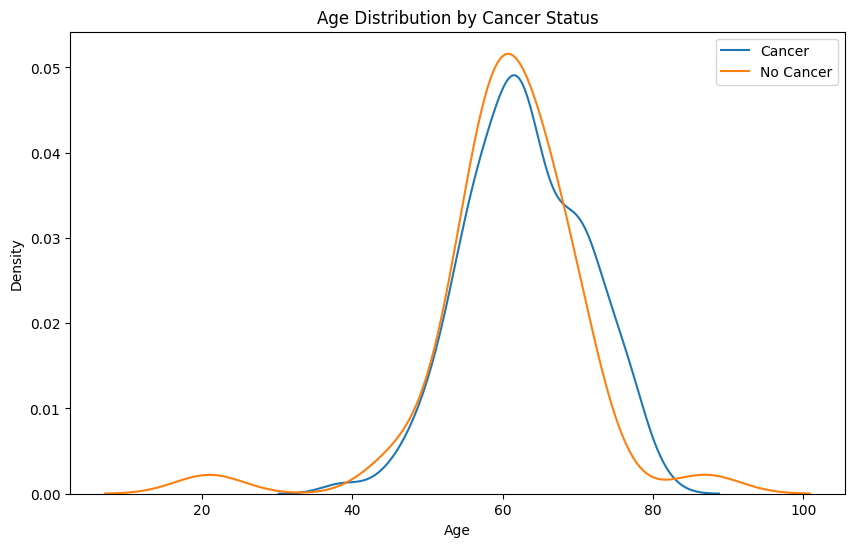

In [111]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data_1[data_1['LUNG_CANCER'] == 'YES']['AGE'],
            label='Cancer')
sns.kdeplot(data=data_1[data_1['LUNG_CANCER'] == 'NO']['AGE'],
            label='No Cancer')
plt.title('Age Distribution by Cancer Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

# **Lung Cancer Associated with Peer Pressure**

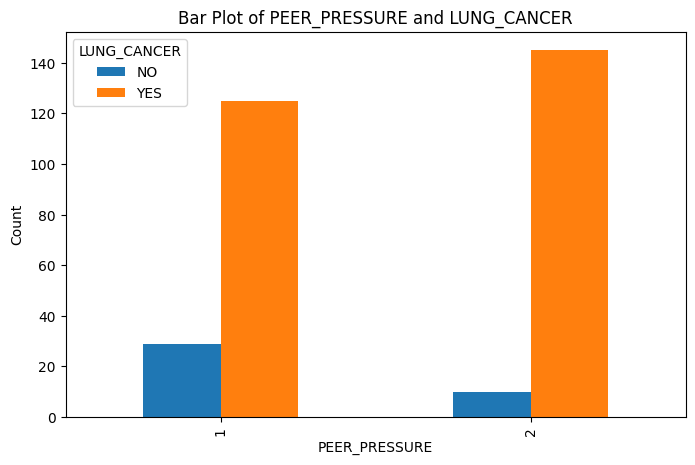

In [112]:
counts = data_1.groupby(['PEER_PRESSURE', 'LUNG_CANCER']).size().unstack()

# Plot the bar plot
counts.plot(kind='bar', figsize=(8, 5))
plt.title('Bar Plot of PEER_PRESSURE and LUNG_CANCER')
plt.ylabel('Count')
plt.xlabel('PEER_PRESSURE')
plt.legend(title='LUNG_CANCER')
plt.show()

Interpretation- Higher peer pressure (level 2) is associated with a larger number of lung cancer cases.
This suggests that peer pressure may influence risky behaviors (e.g., smoking) that are strongly associated with lung cancer.

# **Lung Cancer Among Genders**

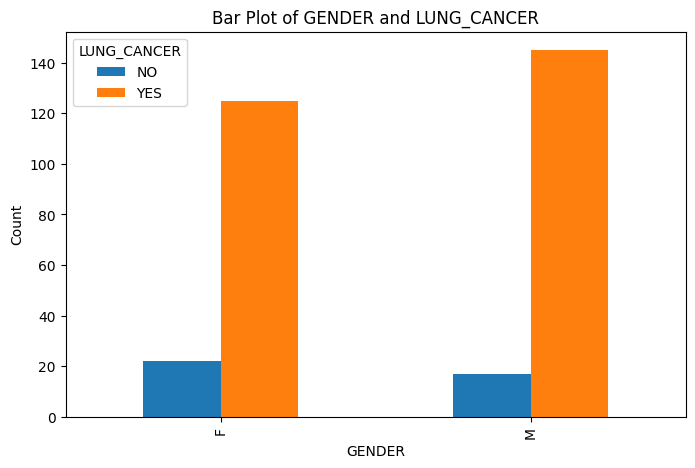

In [113]:
counts = data_1.groupby(['GENDER', 'LUNG_CANCER']).size().unstack()

# Plot the bar plot
counts.plot(kind='bar', figsize=(8, 5))
plt.title('Bar Plot of GENDER and LUNG_CANCER')
plt.ylabel('Count')
plt.xlabel('GENDER')
plt.legend(title='LUNG_CANCER')
plt.show()

The majority of both males and females in the dataset have lung cancer.
Males appear to have a higher count of lung cancer cases than females, which aligns with real-world trends where males are often at higher risk due to lifestyle factors such as smoking. This graph highlights the higher prevalence of lung cancer in both genders, with a slightly greater count among males, emphasizing the need for further investigation into risk factors.

# Risk Factor Correlation Matrix

A correlation matrix heatmap represents possible relationships between different risk factors. The highest positive coefficient is .52 between smoking_severity and anxiety_risk We see weakest negative correlations between the respiratory_score and the variables; smoking_severity (-.18) and anxiety_risk (-.27). The colour is proportional to the degree of correlation, and a positive correlation is indicated by red while a negative correlation is indicated blue.

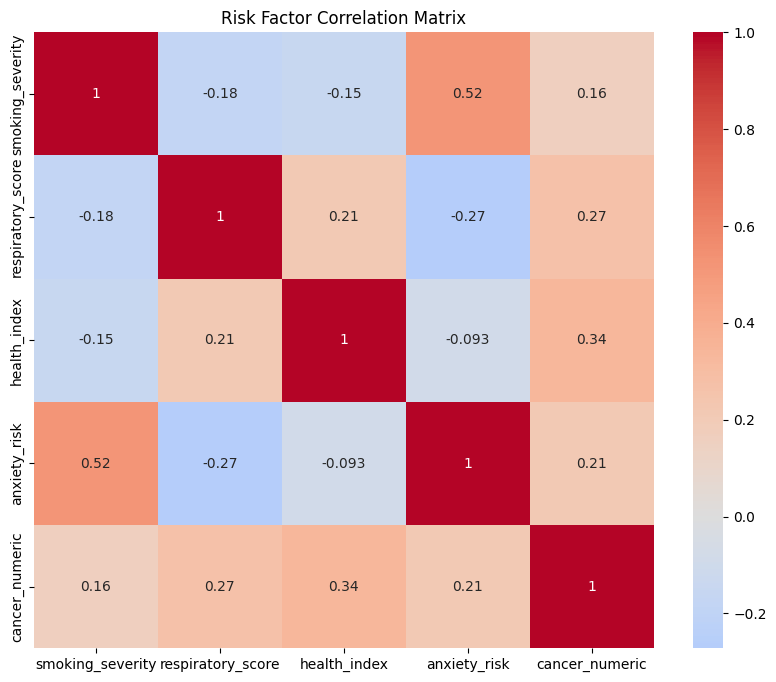

In [114]:
# Risk Factor Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data_1[['smoking_severity', 'respiratory_score',
                            'health_index', 'anxiety_risk',
                            'cancer_numeric']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Risk Factor Correlation Matrix')
plt.show()

Interpretation-
Smoking Severity and Anxiety:
There is a notable relationship between smoking and anxiety, suggesting potential behavioral or psychological links.
Cancer Risk and Health Metrics:

Cancer risk (cancer_numeric) shows moderate relationships with both health_index and respiratory_score, highlighting the importance of general and respiratory health in cancer outcomes.
Weak Relationships:

Some variables, like health_index and anxiety_risk, have near-zero correlation, indicating they are largely independent.

Smoking severity and anxiety levels are moderately linked, suggesting combined risks.

# Number of Lung Cancer Cases by Age Group

A bar graph illustrating the cases of Lung cancer by Age group and it is evident that the lung cancer cases rise as the age progresses increases. The >60 age group presents a high incidence of cases, 160, while the 45-60 age group presented about 100 cases, the actual other groups are significantly below at least the <30 group or 30-45 group.

<ipython-input-115-ea2a0d381637>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_cancer_counts = data_1.groupby('age_group')['LUNG_CANCER'].apply(lambda x: (x == 'YES').sum())


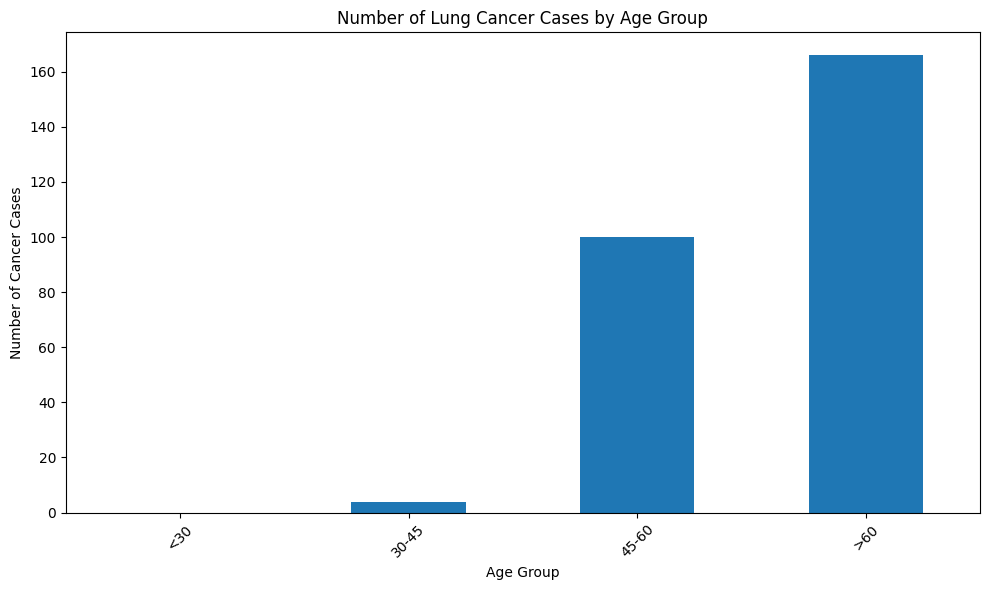

In [115]:
plt.figure(figsize=(10, 6))
age_cancer_counts = data_1.groupby('age_group')['LUNG_CANCER'].apply(lambda x: (x == 'YES').sum())
age_cancer_counts.plot(kind='bar')
plt.title('Number of Lung Cancer Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Cancer Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Interpretation- Lung cancer cases rise as the age progresses increases. It suggests that with age the severity or the tendency of the lung cancer increases.

# **Lung Cancer Association with Smoking**

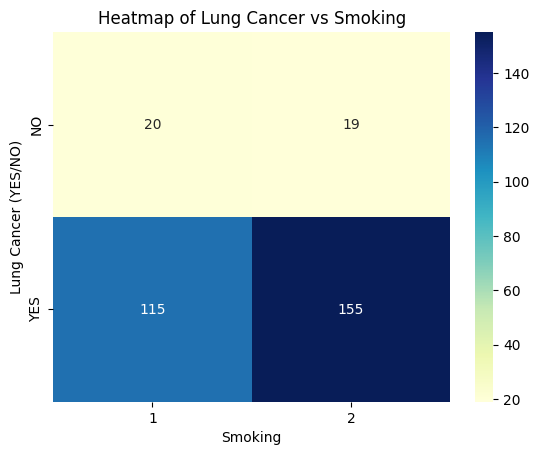

In [116]:
import seaborn as sns

# Creating a crosstab for heatmap
cross_tab = pd.crosstab(data_1['LUNG_CANCER'], data_1['SMOKING'])

# Heatmap Plot
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Lung Cancer vs Smoking")
plt.xlabel("Smoking")
plt.ylabel("Lung Cancer (YES/NO)")
plt.show()

Impact of Smoking on Lung Cancer:
The heatmap confirms that individuals with higher smoking levels are more likely to have lung cancer compared to those who do not smoke.
This relationship strongly suggests that smoking is a significant risk factor for lung cancer.

Disparity Between YES and NO Cases:
The number of individuals with lung cancer (YES) far exceeds those without lung cancer (NO), regardless of smoking levels. This indicates a class imbalance in the data, where lung cancer cases dominate.

# **Lung Cancer Association with Chest Pain**

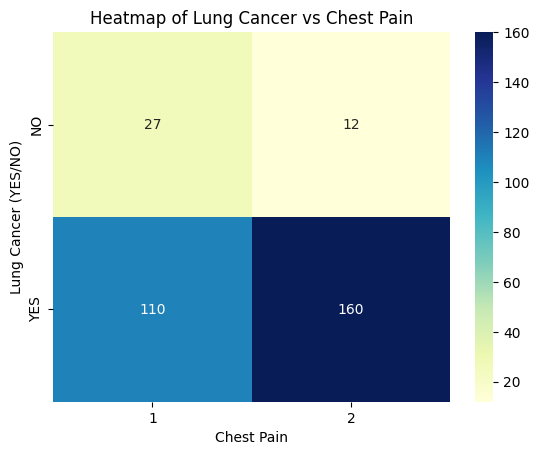

In [117]:
import seaborn as sns

# Creating a crosstab for heatmap
cross_tab = pd.crosstab(data_1['LUNG_CANCER'], data_1['CHEST PAIN'])

# Heatmap Plot
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Lung Cancer vs Chest Pain")
plt.xlabel("Chest Pain")
plt.ylabel("Lung Cancer (YES/NO)")
plt.show()

Chest Pain and Lung Cancer:
The heatmap shows a clear positive association between higher levels of chest pain and the presence of lung cancer (YES).
Individuals experiencing higher chest pain are more likely to have lung cancer.

Non-Lung Cancer Cases:
The number of individuals without lung cancer (NO) is consistently low across both Chest Pain levels, further highlighting the dominance of lung cancer cases in this dataset.

# **Lung Cancer Association with Swallowing Difficulty**

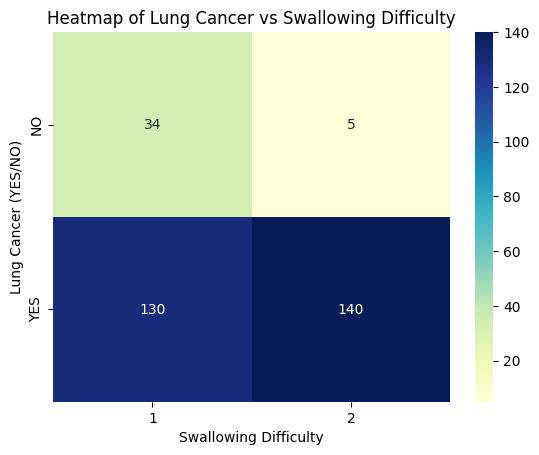

In [118]:
import seaborn as sns

# Creating a crosstab for heatmap
cross_tab = pd.crosstab(data_1['LUNG_CANCER'], data_1['SWALLOWING DIFFICULTY'])

# Heatmap Plot
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Lung Cancer vs Swallowing Difficulty")
plt.xlabel("Swallowing Difficulty")
plt.ylabel("Lung Cancer (YES/NO)")
plt.show()

Swallowing Difficulty as a Key Symptom:
The data shows a strong association between increasing swallowing difficulty and the presence of lung cancer.
Higher levels of swallowing difficulty are correlated with a higher proportion of lung cancer cases.

Small Non-Lung Cancer Group:
The number of individuals without lung cancer (NO) is very small across both levels of swallowing difficulty, especially at Level 2.
This indicates that swallowing difficulty is a potentially significant symptom or predictor for lung cancer.

# Average Risk Factors in Cancer Patients

A line plot is implemented to compare the performance (or, rather, average scores) of various factors (ANXIETY, FATIGUE, WHEEZING, and COUGHING) of cancer patients. FATIGUE means the highest three scores among the patients at about 1.7, then COUGHING mean about 1.625 and ANXIETY mean about 1.525 which indicates that FATIGUE might be the most severe complaint with the patients.

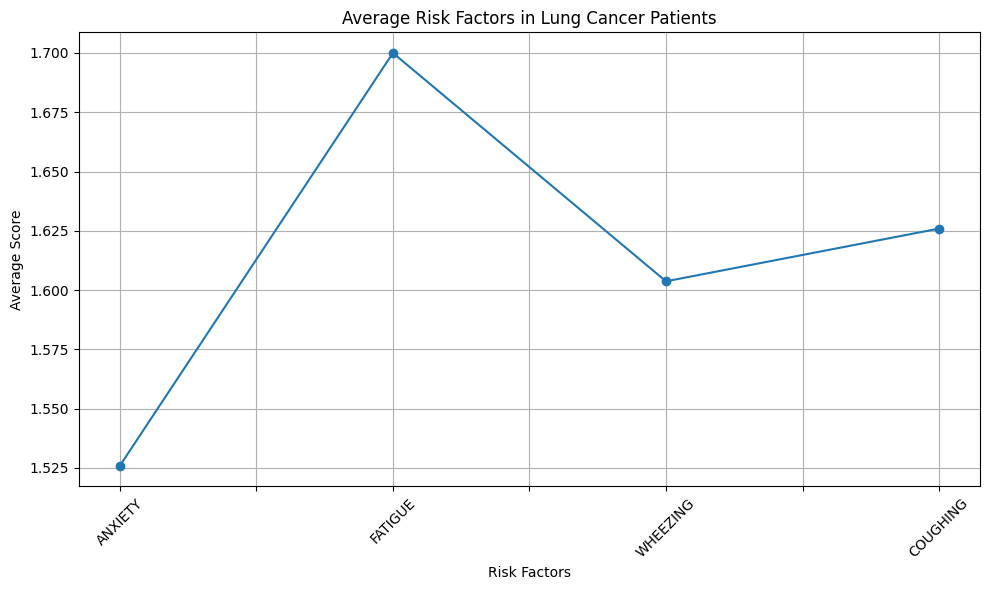

In [119]:
plt.figure(figsize=(10, 6))
risk_factors = ['ANXIETY', 'FATIGUE', 'WHEEZING', 'COUGHING']
avg_risks = data_1[data_1['LUNG_CANCER'] == 'YES'][risk_factors].mean()
avg_risks.plot(kind='line', marker='o')
plt.title('Average Risk Factors in Lung Cancer Patients')
plt.xlabel('Risk Factors')
plt.ylabel('Average Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Interpretation-

Fatigue is Dominant:
Among the four risk factors, fatigue has the highest average score, suggesting it is a key symptom or risk factor experienced by lung cancer patients.

Coughing and Wheezing are Common:
Both symptoms have moderate average scores, indicating their relevance in lung cancer patients.These respiratory issues are consistent with lung cancer's effects on the respiratory system.

Anxiety is the Least Severe:
Anxiety, while present, has the lowest average score, suggesting it may be less impactful compared to physical symptoms like fatigue and respiratory issues.

# Descriptive Statistics

The descriptive_stats function defines more detailed average characteristic numerical value statistics for a numerically-specified variable by giving over a dictionary containing mean, median, standard deviation, variance, skew, kurtosis, inter-quartile range, range, and quartiles. When used in connection with the AGE variable, it gives a full statistical analysis of the age distribution in the dataset.

In [120]:
def descriptive_stats(data: pd.Series) -> dict:
    """
    Calculate comprehensive descriptive statistics for a given variable.

    Parameters:
    data: Series of numerical data to analyze

    Returns:
    Dictionary containing descriptive statistics
    """
    stats_dict = {
        'mean': np.mean(data),
        'median': np.median(data),
        'std': np.std(data),
        'var': np.var(data),
        'skew': stats.skew(data),
        'kurtosis': stats.kurtosis(data),
        'iqr': stats.iqr(data),
        'range': np.ptp(data),
        'q1': np.percentile(data, 25),
        'q3': np.percentile(data, 75)
    }
    return stats_dict

In [81]:
age_stats = descriptive_stats(data_1['AGE'])
for stat, value in age_stats.items():
    print(f"{stat}: {value:.2f}")


mean: 62.67
median: 62.00
std: 8.20
var: 67.19
skew: -0.39
kurtosis: 1.70
iqr: 12.00
range: 66.00
q1: 57.00
q3: 69.00


Interpretation-
The average age of the individuals is around 62.67 years, with a median of 62, showing a roughly symmetric distribution.
The ages are moderately spread out with a standard deviation of 8.2 years and a range of 66 years.
The slight negative skew suggests a minor concentration of younger individuals.
The kurtosis value indicates the presence of some extreme values, potentially older or younger individuals.
Most individuals fall between 57 (Q1) and 69 (Q3) years.

The age group primarily consists of older adults, which aligns with lung cancer being more prevalent in older populations.

# Correlation Analysis

The correlation_analysis function estimates the correlation matrix for any number of numerical variables using the selected method (pearson, spearman, kendall). Put on the numerical columns, (AGE, SMOKING, ANXIETY, FATIGUE, WHEEZING, COUGHING) it depicts how these variables are correlated, -1 representing perfect negative correlation, 1 representing perfect positive correlation.

In [121]:
def correlation_analysis(data: pd.DataFrame, method='pearson') -> pd.DataFrame:
    """
    Perform correlation analysis between numerical variables.

    Parameters:
    data: DataFrame containing numerical variables
    method: Correlation method ('pearson', 'spearman', or 'kendall')

    Returns:
    DataFrame with correlation matrix
    """
    correlation_matrix = data.corr(method=method)
    return correlation_matrix

In [122]:
numerical_columns = ['AGE', 'SMOKING', 'ANXIETY', 'FATIGUE', 'WHEEZING', 'COUGHING']
numerical_data = data_1[numerical_columns]

correlation_results = correlation_analysis(numerical_data, method='pearson')
print(correlation_results)

               AGE   SMOKING   ANXIETY   FATIGUE  WHEEZING  COUGHING
AGE       1.000000 -0.084475  0.053170  0.012614  0.055011  0.169950
SMOKING  -0.084475  1.000000  0.160267 -0.029575 -0.129426 -0.129471
ANXIETY   0.053170  0.160267  1.000000 -0.188538 -0.191807 -0.225644
FATIGUE   0.012614 -0.029575 -0.188538  1.000000  0.141937  0.146856
WHEEZING  0.055011 -0.129426 -0.191807  0.141937  1.000000  0.374265
COUGHING  0.169950 -0.129471 -0.225644  0.146856  0.374265  1.000000


Respiratory Symptoms:
WHEEZING and COUGHING are moderately correlated, suggesting they often co-occur in patients, likely due to respiratory conditions.

Smoking and Anxiety:
There is a weak positive correlation between smoking and anxiety, implying that smoking behavior might be associated with stress or anxiety levels.

Age Impact:
AGE has a weak positive correlation with COUGHING, suggesting that older individuals may experience slightly more respiratory symptoms.
Low Correlations:

Most correlations are weak, suggesting that the variables (AGE, SMOKING, etc.) are fairly independent of one another, with no strong linear relationships.

# Chi Square Test

 Chi_square_test does a test of independence test using the chi-square hypothesis test to compare the two categorical variables and it returns a dictionary of the test statistic, p-value, the degrees of freedom, contingency table and the expected frequency. It is used whenever working with SMOKING and LUNG_CANCER variables and it checks whether the given smoking status is statistically significant for the occurrence of lung cancer.

In [123]:
def chi_square_test(variable1: pd.Series, variable2: pd.Series) -> dict:
    """
    Perform chi-square test of independence between two categorical variables.

    Parameters:
    variable1, variable2: Categorical variables to test

    Returns:
    Dictionary with chi-square statistic, p-value, and contingency table
    """
    contingency_table = pd.crosstab(variable1, variable2)
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    results = {
        'chi2_statistic': chi2,
        'p_value': p_value,
        'degrees_of_freedom': dof,
        'contingency_table': contingency_table,
        'expected_frequencies': expected
    }
    return results

# ***Chi Square Test for Smoking and Lung Cancer ***

In [124]:
smoking_cancer_chi = chi_square_test(data_1['SMOKING'], data_1['LUNG_CANCER'])
print(f"Chi-square statistic: {smoking_cancer_chi['chi2_statistic']:.2f}")
print(f"p-value: {smoking_cancer_chi['p_value']:.4f}")
print("\nContingency Table:")
print(smoking_cancer_chi['contingency_table'])

Chi-square statistic: 0.72
p-value: 0.3953

Contingency Table:
LUNG_CANCER  NO  YES
SMOKING             
1            20  115
2            19  155


Interpretation:
Null Hypothesis (H₀): There is no association between smoking severity and the presence of lung cancer.

p-value = 0.3953: Since the p-value is greater than 0.05 (common significance level), we fail to reject the null hypothesis. This suggests that there is no statistically significant relationship between smoking severity and lung cancer in this dataset.

Chi-Square Statistic = 0.72: The low value of the Chi-Square statistic supports the conclusion that any observed differences in the contingency table are likely due to chance.


# ***Chi Square Test for Gender and Lung Cancer ***

In [125]:
gender_cancer_chi = chi_square_test(data_1['GENDER'], data_1['LUNG_CANCER'])
print(f"Chi-square statistic: {gender_cancer_chi['chi2_statistic']:.2f}")
print(f"p-value: {gender_cancer_chi['p_value']:.4f}")
print("\nContingency Table:")
print(gender_cancer_chi['contingency_table'])

Chi-square statistic: 1.02
p-value: 0.3122

Contingency Table:
LUNG_CANCER  NO  YES
GENDER              
F            22  125
M            17  145


Null Hypothesis (H₀): There is no association between Gender and the presence of lung cancer.
The p-value (0.3122) indicates that there is no significant association between GENDER and the occurrence of LUNG_CANCER.
We fail to reject the null hypothesis, which assumes that gender has no impact on lung cancer outcomes.

# ***Chi Square Test for Fatigue and Lung Cancer ***

In [126]:
fatigue_cancer_chi = chi_square_test(data_1['FATIGUE'], data_1['LUNG_CANCER'])
print(f"Chi-square statistic: {fatigue_cancer_chi['chi2_statistic']:.2f}")
print(f"p-value: {fatigue_cancer_chi['p_value']:.4f}")
print("\nContingency Table:")
print(fatigue_cancer_chi['contingency_table'])

Chi-square statistic: 6.08
p-value: 0.0137

Contingency Table:
LUNG_CANCER  NO  YES
FATIGUE             
1            20   81
2            19  189


Null Hypothesis (H₀): There is no association between FATIGUE and the presence of lung cancer.
The p-value (0.0137) indicates that there is a significant association between FATIGUE levels and lung cancer occurrence.
This means FATIGUE levels are likely related to the presence of lung cancer. We reject the null hypothesis and conclude that FATIGUE is significantly associated with Lung Cancer.

# ***Chi Square Test for Fatigue and Lung Cancer ***

In [127]:
chest_pain_cancer_chi = chi_square_test(data_1['CHEST PAIN'], data_1['LUNG_CANCER'])
print(f"Chi-square statistic: {chest_pain_cancer_chi['chi2_statistic']:.2f}")
print(f"p-value: {chest_pain_cancer_chi['p_value']:.4f}")
print("\nContingency Table:")
print(chest_pain_cancer_chi['contingency_table'])

Chi-square statistic: 10.08
p-value: 0.0015

Contingency Table:
LUNG_CANCER  NO  YES
CHEST PAIN          
1            27  110
2            12  160


Null Hypothesis: There is no association between CHEST PAIN levels and the occurrence of LUNG CANCER.
The p-value (0.0015) confirms a strong relationship between CHEST PAIN levels and lung cancer. We reject the null hypothesis and conclude that Chest Pain is significantly associated with Lung Cancer.

# ***Chi Square Test for Swallowing Difficulty and Lung Cancer ***

In [128]:
swallowing_difficulty_cancer_chi = chi_square_test(data_1['SWALLOWING DIFFICULTY'], data_1['LUNG_CANCER'])
print(f"Chi-square statistic: {swallowing_difficulty_cancer_chi['chi2_statistic']:.2f}")
print(f"p-value: {swallowing_difficulty_cancer_chi['p_value']:.4f}")
print("\nContingency Table:")
print(swallowing_difficulty_cancer_chi['contingency_table'])

Chi-square statistic: 19.31
p-value: 0.0000

Contingency Table:
LUNG_CANCER            NO  YES
SWALLOWING DIFFICULTY         
1                      34  130
2                       5  140


Null Hypothesis: There is no association between Swallowing Difficulty and the occurrence of Lung Cancer.
Highly Significant Association:

The extremely low p-value (0.0000) indicates a strong relationship between Swallowing Difficulty and Lung Cancer occurrence.
We reject the null hypothesis and conclude that Swallowing Difficulty is significantly associated with Lung Cancer.

# **Logistic Regression For Determining the Effect of Factors on the Predictor Lung Cancer**

In [129]:
import statsmodels.api as sm
import pandas as pd

def logistic_regression_analysis(X: pd.DataFrame, y: pd.Series) -> dict:
    """
    Perform multiple logistic regression analysis.

    Parameters:
    X: DataFrame of predictor variables
    y: Series of binary target variable

    Returns:
    Dictionary with regression results
    """
    X = sm.add_constant(X)  # Add constant for intercept
    model = sm.Logit(y, X).fit()  # Logistic Regression Model

    results = {
        'coefficients': model.params,
        'p_values': model.pvalues,
        'conf_intervals': model.conf_int(),
        'summary': model.summary()
    }
    return results

# Preparing predictors and target variable
X = data_1[['SMOKING', 'ANXIETY', 'FATIGUE', 'AGE', 'CHEST PAIN','SHORTNESS OF BREATH', 'PEER_PRESSURE','SWALLOWING DIFFICULTY','YELLOW_FINGERS']]
y = (data_1['LUNG_CANCER'] == 'YES').astype(int)

# Running Logistic Regression
logistic_results = logistic_regression_analysis(X, y)

# Printing Results
print("\nLogistic Regression Summary:")
print("Coefficients:")
for var, coef in zip(['const'] + list(X.columns), logistic_results['coefficients']):
    print(f"{var}: {coef:.4f}")

print("\nP-values:")
print(logistic_results['p_values'])

print("\nConfidence Intervals:")
print(logistic_results['conf_intervals'])

print("\nModel Summary:")
print(logistic_results['summary'])

Optimization terminated successfully.
         Current function value: 0.283054
         Iterations 8

Logistic Regression Summary:
Coefficients:
const: -11.4480
SMOKING: 0.6358
ANXIETY: 0.1001
FATIGUE: 1.2756
AGE: 0.0454
CHEST PAIN: 1.3106
SHORTNESS OF BREATH: 0.3070
PEER_PRESSURE: 0.9359
SWALLOWING DIFFICULTY: 1.8664
YELLOW_FINGERS: 0.9304

P-values:
const                    0.000006
SMOKING                  0.130574
ANXIETY                  0.848500
FATIGUE                  0.004311
AGE                      0.059166
CHEST PAIN               0.001925
SHORTNESS OF BREATH      0.515172
PEER_PRESSURE            0.041609
SWALLOWING DIFFICULTY    0.001798
YELLOW_FINGERS           0.041736
dtype: float64

Confidence Intervals:
                               0         1
const                 -16.418246 -6.477749
SMOKING                -0.188444  1.459960
ANXIETY                -0.927228  1.127496
FATIGUE                 0.399718  2.151448
AGE                    -0.001755  0.092473
CHEST PAI

Significant Predictors (p-value < 0.05):
FATIGUE: Positive and significant effect on lung cancer odds.
CHEST PAIN: Strong positive effect, indicating chest pain is associated with increased lung cancer odds.
PEER_PRESSURE: Significant positive association.
SWALLOWING DIFFICULTY: Strongest positive predictor, increasing the odds.
YELLOW_FINGERS: Positive and significant.

Non-Significant Predictors (p-value > 0.05):
SMOKING: While it has a positive coefficient, it is not statistically significant.
ANXIETY and SHORTNESS OF BREATH: Have very weak effects and are not significant.
AGE: Borderline significance; its coefficient suggests that increasing age slightly raises the odds of lung cancer.

For significant positive coefficients, the odds of having lung cancer increase:
SWALLOWING DIFFICULTY (highest coefficient: 1.8664) is strongly associated with lung cancer.
CHEST PAIN, FATIGUE, and YELLOW_FINGERS also substantially increase lung cancer odds.

# Conclusion

Based on the comprehensive analysis of lung cancer data, here are the key conclusions:

From the evaluation of age distribution it is clear that the rate of incidence of lung cancer is strongly related to age with maximum concentration among patients more than 60 years of age. This is well illustrated by extracting the density plots and bar charts, where distinct elevation in elderly age brackets is visible.
The various graphs shows how the Lung cancer is related to the different factors in the dataset.

During the correlation analysis, rather provocative connections between different risk factors were identified. Most importantly, moderate positive correlation (0.52) was found between smoking severity and risk of anxiety, which can be indicative of the stress with psychological problems associated with smoking behavior. Nonetheless, the results identified the respiratory scores, which have negative relations with smoking severity and the risk of anxiety.

Out of the four Anxiety, Fatigue, Wheezing and Coughing, Fatigue is the highest risk factors that is depicted from the graph.

The statistical tests give further information as follows. The chi-square test results (p-value).It is worth noting that the model output in smokers and lung cancer in this dataset shows statistically insignificant, which is incongruous with the expected result and needs a better examination.

According to various symptom reports, from a clinical viewpoint, the most observed symptoms were swallowing difficulty,fatigue,chest painand yellow fingers from the Logistic Regression. The same results are depicted by the chi-square test. Perhaps, this finding could help in devising the plans for identifying the onset of clinical symptoms and their maintenance. The study also found out that distribution and effects of risks differ by age and gender, and it therefore points to the fact that there is a need for early detection and prevention measures appropriate to distinct demographics.




